## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
#Run to make sure data loads
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#Run to make sure data loads
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#Combine both CSV files on the Mouse ID
mouse_data_combined_df = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])
mouse_data_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
num_mice = mouse_data_combined_df["Mouse ID"].nunique()
num_mice

249

In [6]:
# Remove duplicate mouse IDs
mouse_data_combined_cleaned = mouse_data_combined_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)
mouse_data_combined_cleaned


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [7]:
#Group to find mean
mouse_data_mean = mouse_data_combined_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
mouse_data_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.458254
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [8]:
#Group to find median
mouse_data_median = mouse_data_combined_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
mouse_data_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [9]:
#Group to find variance
mouse_data_variance = mouse_data_combined_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
mouse_data_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     44.053659
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [10]:
#Group to find Standard Deviation
mouse_data_std = mouse_data_combined_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
mouse_data_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.637293
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#Group to find SEM
mouse_data_stderror = mouse_data_combined_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
mouse_data_stderror

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.540135
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#Create Summary Data Frame Table
mouse_data_summary_df = pd.DataFrame({"Tumor Volume Mean": mouse_data_mean,
                                      "Tumor Volume Median": mouse_data_median,
                                      "Tumor Volume Variance": mouse_data_variance,
                                      "Tumor Volume Standard Deviation": mouse_data_std,
                                      "Tumor Volume Standard Error": mouse_data_stderror})
mouse_data_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
#Create Summary Data Frame table with aggregate function
mouse_data_summary_df_agg = mouse_data_combined_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var','std', 'sem'])
mouse_data_summary_df_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.



In [46]:
#Group by timepoints for totals by Drug Regimen
total_timepoints = mouse_data_combined_cleaned.groupby(["Drug Regimen"])["Timepoint"].count()
total_timepoints


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

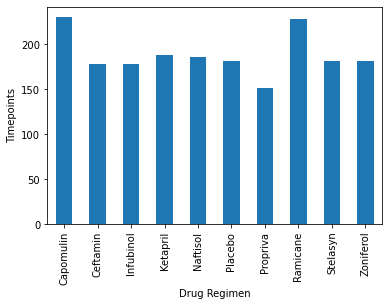

In [47]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#Create bar chart
timepoints_chart = total_timepoints.plot(kind='bar')
timepoints_chart.set_xlabel("Drug Regimen")
timepoints_chart.set_ylabel("Timepoints")
plt.show()

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
total_female_male = mouse_data_combined_cleaned.groupby(["Sex"])["Mouse ID"].count()
total_female_male


Sex
Female    925
Male      958
Name: Mouse ID, dtype: int64

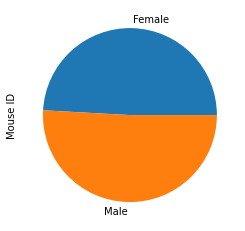

In [50]:
total_female_male_chart = total_female_male.plot(kind='pie', y= 'Mouse ID')
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [63]:
#Find Max value of timepoint for each mouse ID
max_timepoint = mouse_data_combined_cleaned.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [76]:
#Create new dataframe for max timepoint for each mouse ID
max_timepoint_df = pd.DataFrame ({"Mouse ID": max_timepoint})
max_timepoint_df.head()

,Mouse ID
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30


In [77]:
#Merge original dataframe with new max timepoint dataframe
mouse_data_combined_stats_df = pd.merge(mouse_data_combined_cleaned, max_timepoint, how="outer", on=["Mouse ID"])
mouse_data_combined_stats_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [75]:
#Rename timepoint columns
merged_mouse_data = mouse_data_combined_stats_df.rename(columns={"Timepoint_x": "Timepoint", "Timepoint_y": "Max Timepoint"})
merged_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [103]:

merged_mouse_data_df = merged_mouse_data.loc[merged_mouse_data["Drug Regimen"]=="Ramicane"]
                       merged_mouse_data.loc[merged_mouse_data["Drug Regimen"]=="Capomulin"]
merged_mouse_data_df

IndentationError: unexpected indent (<ipython-input-103-3a505a9820d5>, line 2)

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
